In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
order = pd.read_excel('/content/drive/MyDrive/Sales/003-Order-Details.xlsx')
store = pd.read_excel('/content/drive/MyDrive/Sales/001-Store-Information.xlsx')
customer = pd.read_excel('/content/drive/MyDrive/Sales/002-Customer-Information.xlsx')

In [3]:
order
# store
# customer

,Order-ID,Store-ID,Customer-ID,Payment-Method,Invoice-Value,Order-Date
0,99146110018K0120110004451277782,99146110018,K0120110004,Credit Card,350,2023-07-20
1,14627110043N0076110039449858677,14627110043,N0076110039,COD,986,2023-02-28
2,56502110006P0061110032438519675,56502110006,P0061110032,Wallets,106,2020-01-21
3,42173110030S0065110047452037708,42173110030,S0065110047,BNPL,728,2023-10-04
4,48039110009S0063110013444549300,48039110009,S0063110013,UPI,685,2021-09-15
...,...,...,...,...,...,...
655972,59338110025T0013110026450198983,59338110025,T0013110026,COD,364,2023-04-03
655973,99601110012P0008110032440725728,99601110012,P0008110032,UPI,380,2020-08-29
655974,62475110033J0076110016449073992,62475110033,J0076110016,UPI,946,2022-12-12
655975,45422110027P0080110008444412495,45422110027,P0080110008,Wallets,952,2021-09-02


In [4]:
store

,Store-ID,Store-ZIP,Address,Store-Manager,Store-Opening,Cluster
0,59338110025,110025,Safdarjung Enclave,Advait Mishra,1982-12-31,1
1,13170110011,110011,Rajinder Nagar,Aryan Choudhury,1990-08-10,1
2,98072110045,110045,Sonia Vihar,Neha Bhatia,1990-08-18,1
3,92197110010,110010,Punjabi Bagh,Maya Desai,2003-09-03,1
4,90617110034,110034,Pitampura,Riya Thakur,2009-04-16,1
5,27041110042,110042,Nand Nagri,Rohan Shukla,2013-05-06,1
6,87714110037,110037,Nangloi,Kabir Malhotra,2015-12-07,1
7,43207110028,110028,Naraina,Esha Joshi,1998-06-24,2
8,33367110038,110038,Najafgarh,Avni Sharma,2000-07-13,2
9,23075110016,110016,Jor Bagh,Zara Khan,2006-08-20,2


In [5]:
customer

,Customer-ID,Customer-ZIP,Address,Membership-Date
0,N0001110038,110038,Najafgarh,2020-05-03
1,R0001110015,110015,Rajouri Garden,1993-08-17
2,H0001110024,110024,Hauz Khas,2022-09-19
3,S0001110012,110012,Sarai Rohilla,2010-12-13
4,K0001110007,110007,Kamla Nagar,2008-04-18
...,...,...,...,...
4995,R0088110027,110027,Rajouri Garden,2021-07-16
4996,S0094110012,110012,Sarai Rohilla,2019-01-05
4997,P0094110005,110005,Paharganj,1987-02-14
4998,A0109110035,110035,Adarsh Nagar,2007-05-22


In [6]:
# Date columns to datetime
order['Order-Date'] = pd.to_datetime(order['Order-Date'])
customer['Membership-Date'] = pd.to_datetime(customer['Membership-Date'])
store['Store-Opening'] = pd.to_datetime(store['Store-Opening'])

What is the total revenue and no. of  sales in each store on monthly basis?

         Store-ID Order-Date  Invoice-Value  Order-ID
0     10539110026    2020-01         102705       209
1     10539110026    2020-02         104438       210
2     10539110026    2020-03         115749       229
3     10539110026    2020-04         115933       235
4     10539110026    2020-05         152226       293
...           ...        ...            ...       ...
2445  99744110048    2023-09         119983       258
2446  99744110048    2023-10         142111       301
2447  99744110048    2023-11         135483       265
2448  99744110048    2023-12         133443       273
2449  99744110048    2024-01         162733       315

[2450 rows x 4 columns]


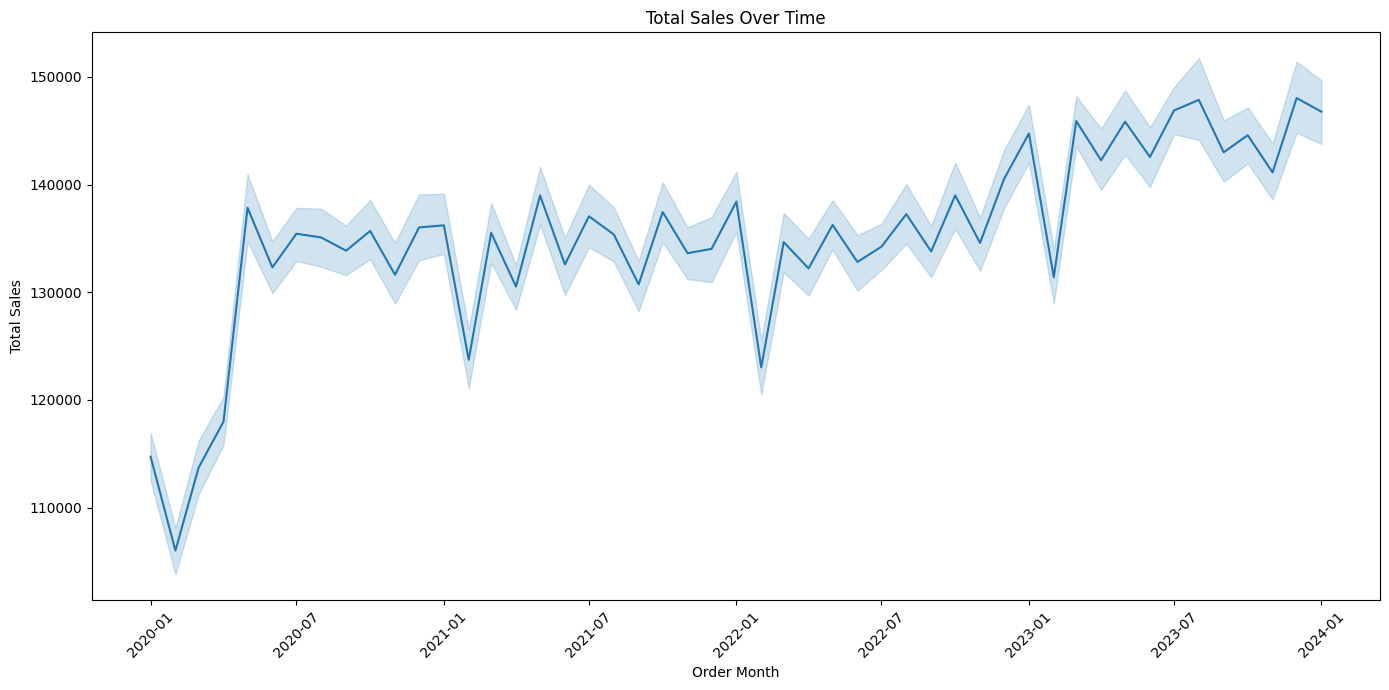

In [7]:
# Group by Store-ID and month, then aggregate
monthly_store_sales = order.groupby([order['Store-ID'], order['Order-Date'].dt.to_period('M')]).agg({
    'Invoice-Value': 'sum',
    'Order-ID': 'count'
}).reset_index()
print(monthly_store_sales)

# Rename columns
monthly_store_sales.columns = ['Store-ID', 'Month', 'Total Revenue', 'Number of Sales']

# Convert 'Month' column to datetime objects
monthly_store_sales['Month'] = monthly_store_sales['Month'].dt.to_timestamp() # Convert Period objects to datetime


# Plotting the total sales over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_store_sales, x='Month', y='Total Revenue')
plt.title('Total Sales Over Time')
plt.xlabel('Order Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Identify and analyse the months with the highest sales spikes?

      Month  Total Sales
47  2023-12      7401545
43  2023-08      7393302
42  2023-07      7343858
48  2024-01      7338400
38  2023-03      7294974


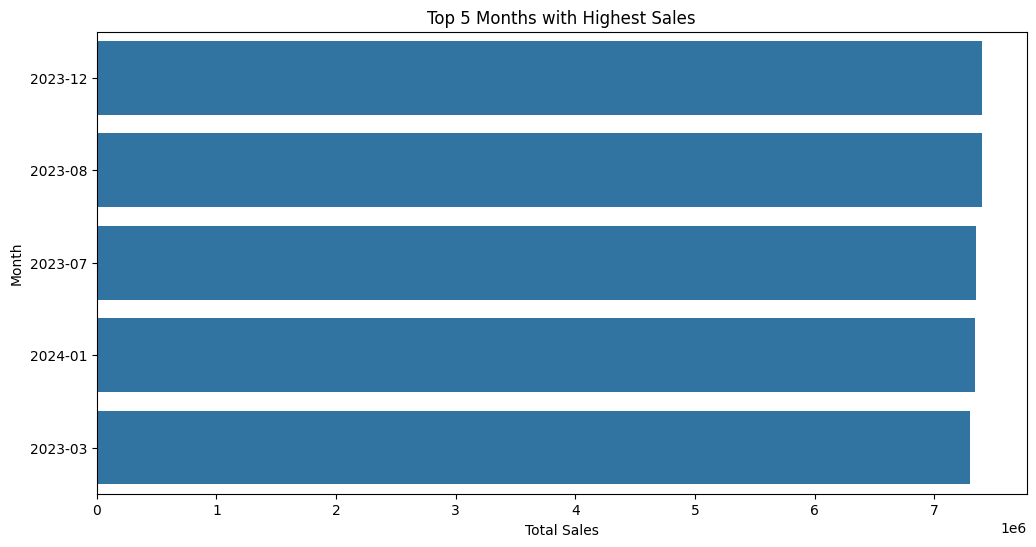

In [8]:
monthly_sales = order.groupby(order['Order-Date'].dt.to_period('M'))['Invoice-Value'].sum().reset_index()
monthly_sales.columns = ['Month', 'Total Sales']
top_months = monthly_sales.nlargest(5, 'Total Sales')
print(top_months)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_months, y='Month', x='Total Sales', orient='h')
plt.title('Top 5 Months with Highest Sales')

plt.show()

Are there any noticeable seasonal patterns (summer, autumn, winter, spring)  in the sales data?

<ipython-input-9-6f6d3ade5a5f>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_sales = order.groupby('Season')['Invoice-Value'].sum()


Season
Autumn    81953091
Spring    80584309
Summer    82471818
Winter    86182267
Name: Invoice-Value, dtype: int64


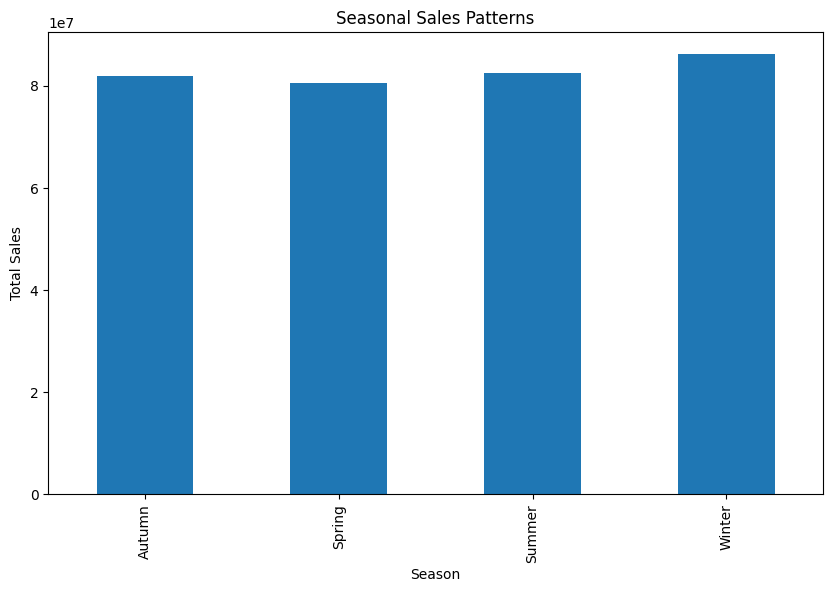

In [9]:
# inclusive bins, pd.cut for discetizing continuous into categorical intervals
order['Season'] = pd.cut(order['Order-Date'].dt.month,
                             bins=[0, 2, 5, 8, 11, 12],  # Adjusted bins
                             labels=['Winter', 'Spring', 'Summer', 'Autumn', 'Winter'],  # Wrap around for December
                             ordered=False)  # Treat labels as unordered categories
seasonal_sales = order.groupby('Season')['Invoice-Value'].sum()
print(seasonal_sales)

plt.figure(figsize=(10, 6))
seasonal_sales.plot(kind='bar')
plt.title('Seasonal Sales Patterns')
plt.ylabel('Total Sales')
plt.show()

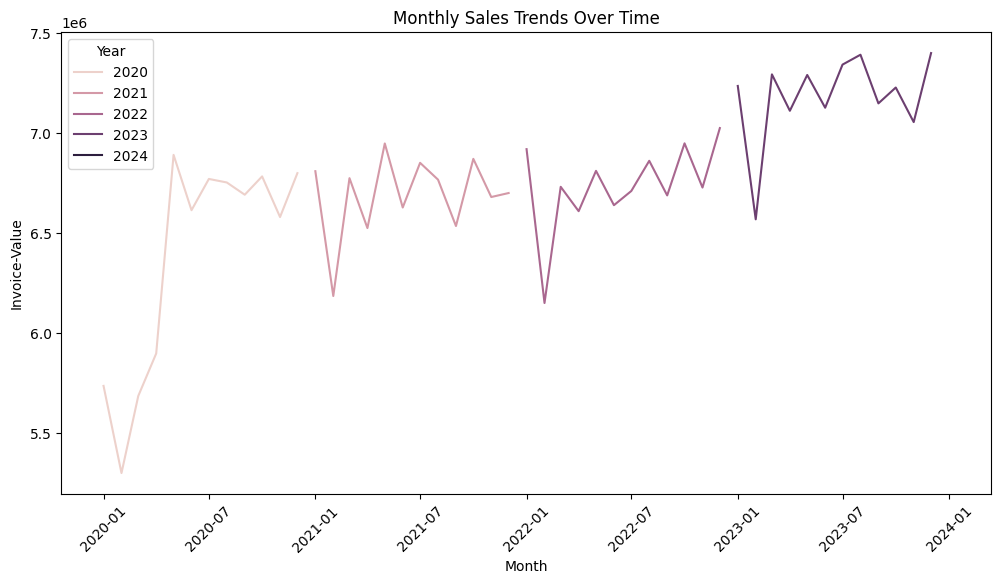

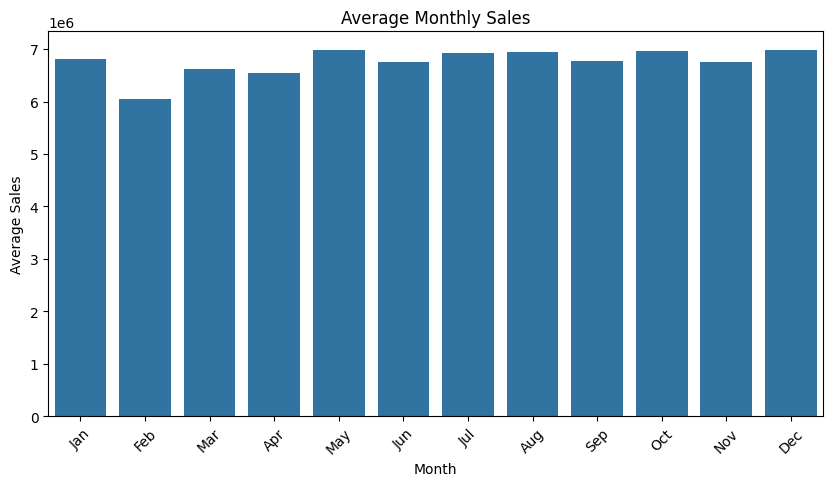

<Figure size 1200x800 with 0 Axes>

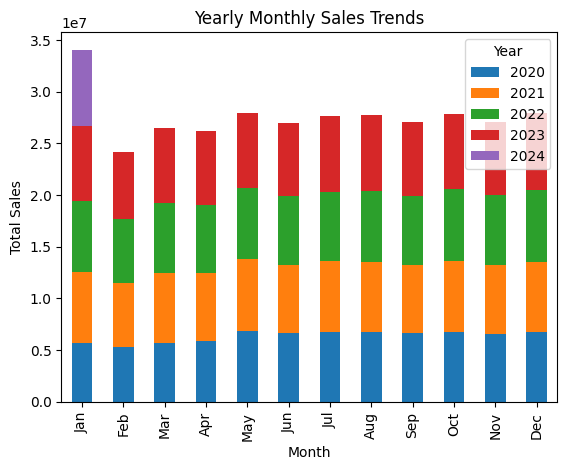

In [16]:
# yearly monthly sales patten
order['Month'] = order['Order-Date'].dt.to_period('M')
order['Year'] = order['Order-Date'].dt.year

# Calculate monthly sales
monthly_sales = order.groupby(['Year', 'Month'])['Invoice-Value'].sum().reset_index()

# Convert 'Month' back to datetime for plotting
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

# Plot monthly sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Invoice-Value', hue='Year')
plt.title('Monthly Sales Trends Over Time')
plt.xticks(rotation=45)
plt.show()

# Analyze monthly sales patterns
monthly_avg_sales = monthly_sales.groupby(monthly_sales['Month'].dt.month)['Invoice-Value'].mean().reset_index()
monthly_avg_sales.columns = ['Month', 'Average Sales']

plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_avg_sales, x='Month', y='Average Sales')
plt.title('Average Monthly Sales')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

# Extract year and month
order['Year'] = order['Order-Date'].dt.year
order['Month'] = order['Order-Date'].dt.month

# Group by Year and Month and calculate total sales
yearly_monthly_sales = order.groupby(['Year', 'Month'])['Invoice-Value'].sum().unstack().fillna(0)

# Visualization
plt.figure(figsize=(12, 8))
yearly_monthly_sales.T.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Yearly Monthly Sales Trends')
plt.legend(title='Year')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


Which month shows the highest and lowest sales?

In [11]:
monthly_sales['Month'] = monthly_sales['Month'].astype(str)
highest_month = monthly_sales.loc[monthly_sales['Invoice-Value'].idxmax()]  # Use 'Invoice-Value'
lowest_month = monthly_sales.loc[monthly_sales['Invoice-Value'].idxmin()]  # Use 'Invoice-Value'

print(f"Month with highest sales: {highest_month['Month']} (${highest_month['Invoice-Value']:,.2f})")  # Use 'Invoice-Value'
print(f"Month with lowest sales: {lowest_month['Month']} (${lowest_month['Invoice-Value']:,.2f})")  # Use 'Invoice-Value'

Month with highest sales: 2023-12-01 ($7,401,545.00)
Month with lowest sales: 2020-02-01 ($5,300,543.00)


What are the total sales for each cluster of the stores? Do different store clusters exhibit different seasonal sales patterns?

Total sales for each cluster:
Cluster
1    46551043
2    32914732
3    46260212
4    46328566
5    72942239
6    33223304
7    33155400
8    19815989
Name: Invoice-Value, dtype: int64


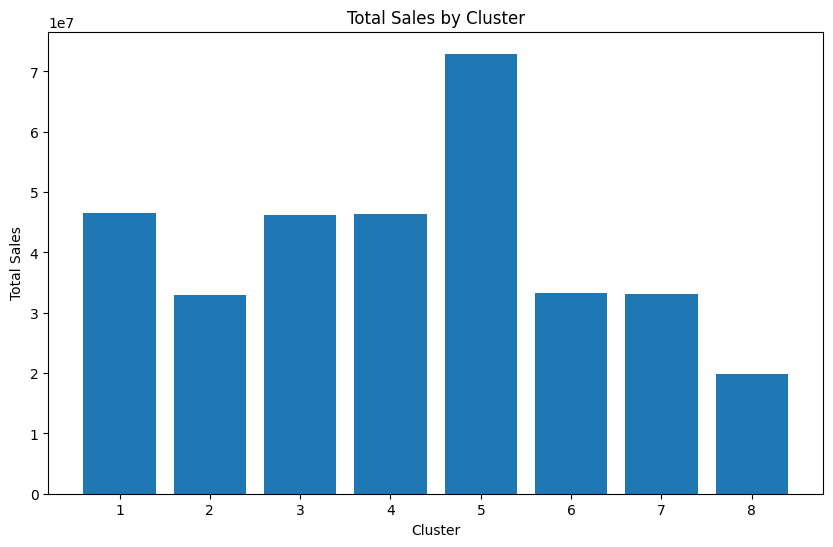

<ipython-input-12-bb01b18ee92c>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_seasonal_sales = store_orders.groupby(['Cluster', 'Season'])['Invoice-Value'].sum().unstack()


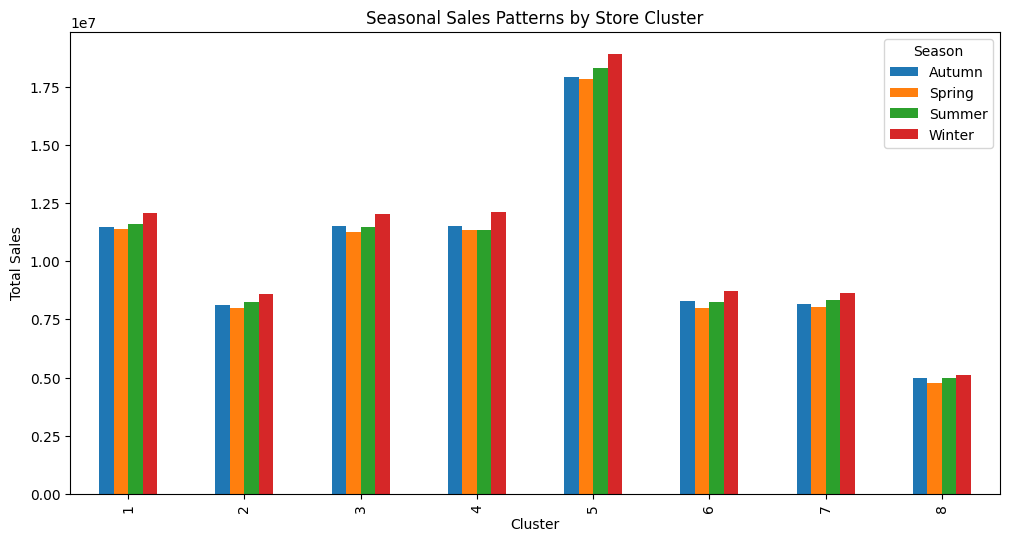

In [12]:
# Merge datasets
store_orders = pd.merge(store, order, left_on='Store-ID', right_on='Store-ID')
cluster_sales = store_orders.groupby('Cluster')['Invoice-Value'].sum()
print("Total sales for each cluster:")
print(cluster_sales)

# Group by Cluster and calculate total sales
cluster_sales = store_orders.groupby('Cluster')['Invoice-Value'].sum().reset_index()

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(cluster_sales['Cluster'], cluster_sales['Invoice-Value'])
plt.xlabel('Cluster')
plt.ylabel('Total Sales')
plt.title('Total Sales by Cluster')
plt.show()

# Seasonal sales patterns
cluster_seasonal_sales = store_orders.groupby(['Cluster', 'Season'])['Invoice-Value'].sum().unstack()
cluster_seasonal_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Seasonal Sales Patterns by Store Cluster')
plt.ylabel('Total Sales')
plt.legend(title='Season')
plt.show()



How does sales performance vary by demographic segment?

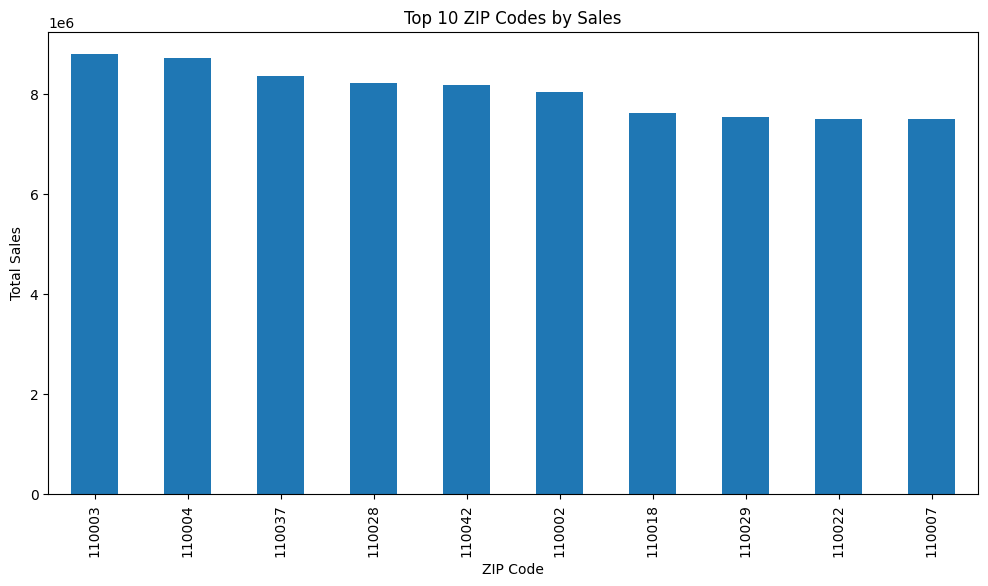

In [13]:
# Merge datasets
customer_orders = pd.merge(customer, order, left_on='Customer-ID', right_on='Customer-ID')
# customer_sales = customer_orders.groupby('Customer-Segment')['Invoice-Value'].sum()
# print("Sales performance by demographic segment:")
customer_orders
zip_sales = customer_orders.groupby('Customer-ZIP')['Invoice-Value'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
zip_sales.head(10).plot(kind='bar')
plt.title('Top 10 ZIP Codes by Sales')
plt.xlabel('ZIP Code')
plt.ylabel('Total Sales')
plt.show()

What are the characteristics of repeat customers versus one-time buyers?

In [15]:
customer_order_counts = order.groupby('Customer-ID')['Order-ID'].count()
repeat_customers = customer_order_counts[customer_order_counts > 1].index
one_time_buyers = customer_order_counts[customer_order_counts == 1].index

repeat_data = customer_orders[customer_orders['Customer-ID'].isin(repeat_customers)]
one_time_data = customer_orders[customer_orders['Customer-ID'].isin(one_time_buyers)]

print("Repeat Customers:")
print(f"Average order value: ${repeat_data['Invoice-Value'].mean():.2f}")
print(f"Most common payment method: {repeat_data['Payment-Method'].mode().values[0]}")

print("\nOne-Time Buyers:")
print(f"Average order value: ${one_time_data['Invoice-Value'].mean():.2f}")
# Check if there are any one-time buyers before accessing the mode
if not one_time_data.empty:
    print(f"Most common payment method: {one_time_data['Payment-Method'].mode().values[0]}")
else:
    print("No one-time buyers found.")

Repeat Customers:
Average order value: $504.88
Most common payment method: UPI

One-Time Buyers:
Average order value: $nan
No one-time buyers found.


How is the sales distribution across different payment methods?

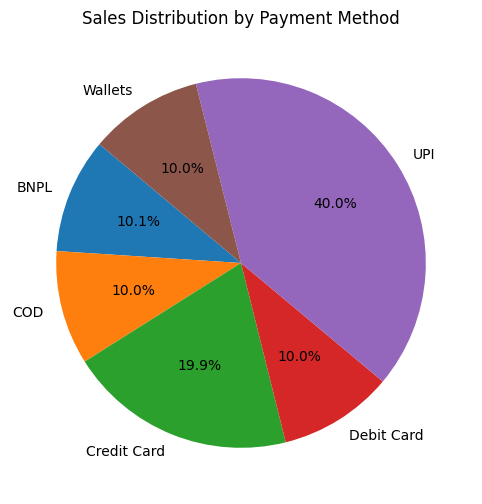

In [18]:
# Group by Payment-Method and calculate total sales
payment_sales = order.groupby('Payment-Method')['Invoice-Value'].sum().reset_index()

# Visualization
plt.figure(figsize=(10, 6))
plt.pie(payment_sales['Invoice-Value'], labels=payment_sales['Payment-Method'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Payment Method')
plt.show()


Which store has highest no. orders?

In [21]:
store_order_counts = order['Store-ID'].value_counts()
top_store = store_order_counts.index[0]
# Find the store with the highest number of orders
top_store = store_order_counts.idxmax()
num_orders = store_order_counts.max()

print(f"The store with the highest number of orders is Store-ID: {top_store} with {num_orders} orders.")

The store with the highest number of orders is Store-ID: 22043110050 with 13318 orders.


What is the no. of customers in a particular zip code?

In [24]:
customers_per_zip = customer['Customer-ZIP'].value_counts()
print("Number of customers in each ZIP code:")
print(customers_per_zip)

Number of customers in each ZIP code:
Customer-ZIP
110003    124
110004    123
110028    118
110037    117
110008    116
110042    115
110002    114
110017    111
110035    109
110029    108
110013    107
110007    107
110030    106
110023    105
110021    105
110018    105
110022    105
110032    104
110006    104
110010    104
110040    103
110049    103
110026    102
110044    101
110020     99
110009     99
110033     97
110036     97
110048     97
110045     96
110025     95
110012     94
110031     94
110024     94
110005     94
110011     94
110046     93
110015     93
110014     92
110041     92
110050     92
110001     91
110038     90
110027     88
110019     87
110039     87
110016     86
110047     85
110034     81
110043     77
Name: count, dtype: int64


what are the descriptive statistics of invoice values and payment channels?

Descriptive statistics of invoice values:
count    655977.000000
mean        504.882770
std         286.196879
min          10.000000
25%         257.000000
50%         505.000000
75%         753.000000
max        1000.000000
Name: Invoice-Value, dtype: float64


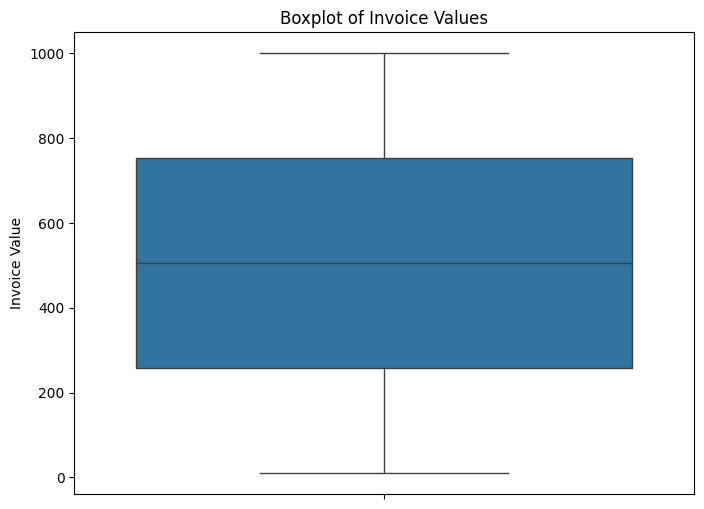


Payment method distribution:
Payment-Method
UPI            0.399927
Credit Card    0.199298
BNPL           0.100912
COD            0.100168
Debit Card     0.100125
Wallets        0.099569
Name: proportion, dtype: float64


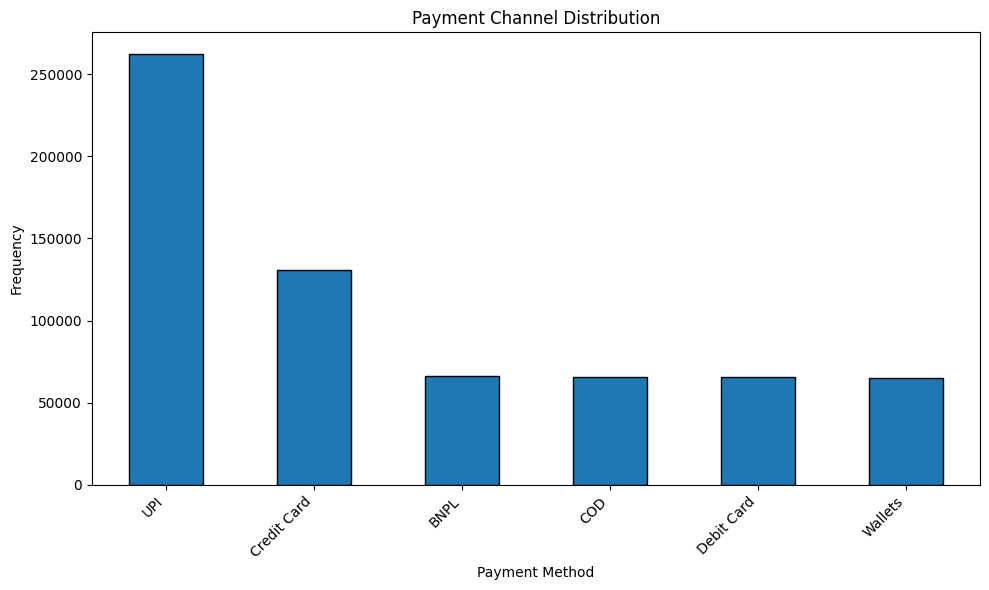

In [28]:
print("Descriptive statistics of invoice values:")
print(order['Invoice-Value'].describe())
# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=order['Invoice-Value'])
plt.ylabel('Invoice Value')
plt.title('Boxplot of Invoice Values')
plt.show()

print("\nPayment method distribution:")
print(order['Payment-Method'].value_counts(normalize=True))
payment_counts = order['Payment-Method'].value_counts()

plt.figure(figsize=(10, 6))
payment_counts.plot(kind='bar', edgecolor='black')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.title('Payment Channel Distribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

What is the monthly sales trend for each year?

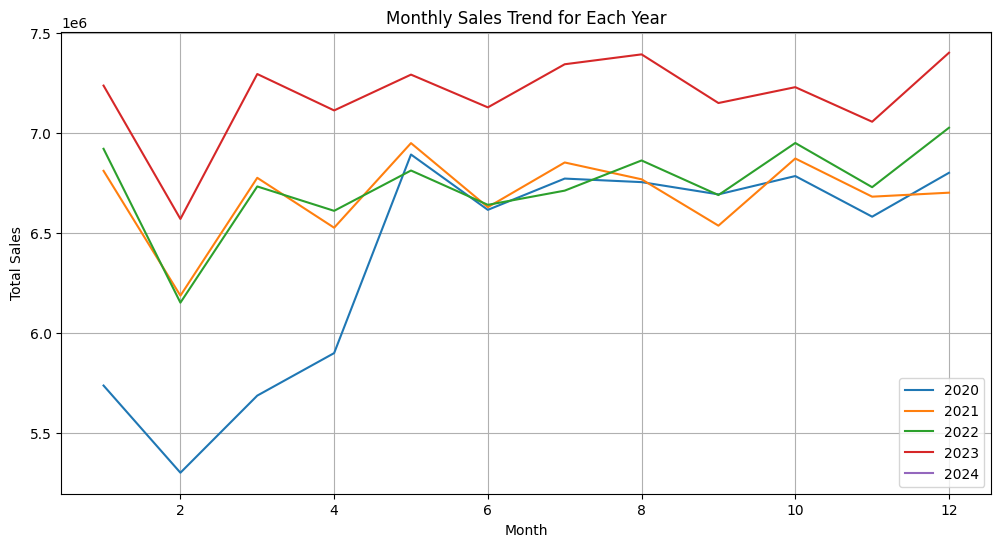

In [32]:
# Group data by year and month, and calculate total sales for each group
monthly_sales = order.groupby(['Year', 'Month'])['Invoice-Value'].sum().reset_index()

# Plot the monthly sales trend for each year
plt.figure(figsize=(12, 6))
for year in monthly_sales['Year'].unique():
    year_data = monthly_sales[monthly_sales['Year'] == year]
    plt.plot(year_data['Month'], year_data['Invoice-Value'], label=str(year))

plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend for Each Year')
plt.legend()
plt.grid(True)
plt.show()

What is the year over year sales growth rate for each month?

<ipython-input-36-cec18b3fbb73>:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  yoy_growth = yearly_monthly_sales.pct_change()


Order-Date        1         2         3         4         5         6   \
Order-Date                                                               
2020             NaN       NaN       NaN       NaN       NaN       NaN   
2021        0.187224  0.167122  0.191606  0.106332  0.008268  0.002038   
2022        0.016181 -0.005675 -0.006385  0.012939 -0.019715  0.001749   
2023        0.045691  0.068064  0.083538  0.075978  0.070408  0.073419   
2024        0.013993  0.000000  0.000000  0.000000  0.000000  0.000000   

Order-Date        7         8         9         10        11        12  
Order-Date                                                              
2020             NaN       NaN       NaN       NaN       NaN       NaN  
2021        0.011900  0.002090 -0.023390  0.012938  0.015214 -0.014638  
2022       -0.020556  0.013922  0.023429  0.011294  0.007098  0.048488  
2023        0.094193  0.077332  0.068821  0.040180  0.048665  0.053396  
2024        0.000000  0.000000  0.000000  0

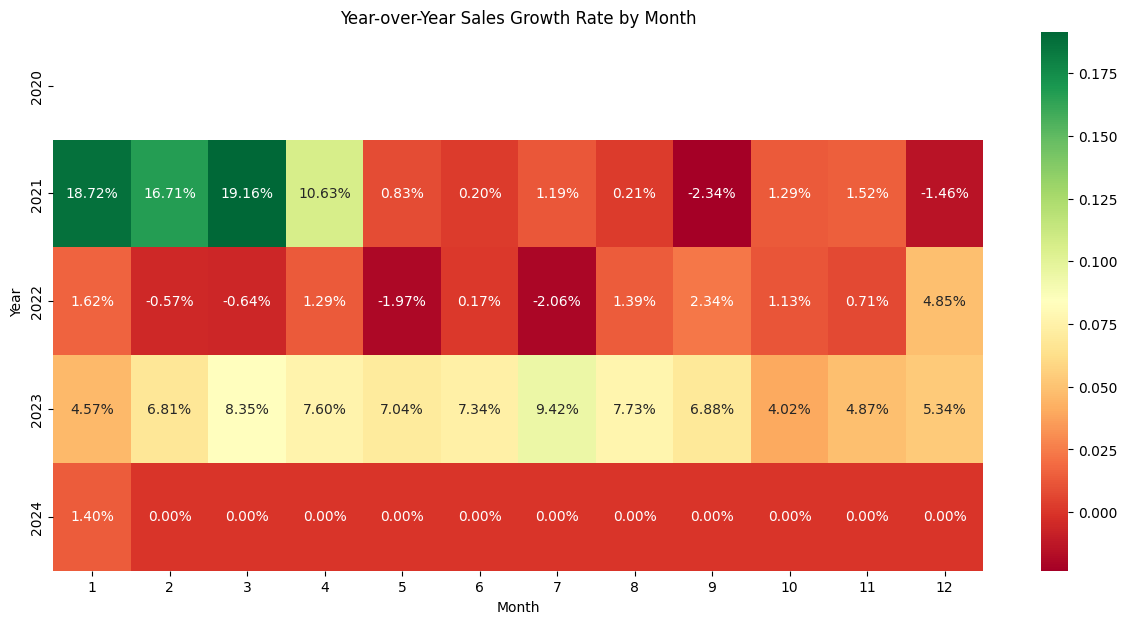

In [36]:
yearly_monthly_sales = order.groupby([order['Order-Date'].dt.year, order['Order-Date'].dt.month])['Invoice-Value'].sum().unstack()
yoy_growth = yearly_monthly_sales.pct_change()
print(yoy_growth)

plt.figure(figsize=(15, 7))
sns.heatmap(yoy_growth, annot=True, fmt='.2%', cmap='RdYlGn')
plt.title('Year-over-Year Sales Growth Rate by Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

What are the top 5 stores?

In [37]:
top_stores = order.groupby('Store-ID')['Invoice-Value'].sum().sort_values(ascending=False).head()
print("Top 5 stores by total sales:")
print(top_stores)

Top 5 stores by total sales:
Store-ID
99601110012    6743778
84307110020    6741750
33693110041    6715376
45818110031    6699681
66510110023    6695841
Name: Invoice-Value, dtype: int64


What are the top5 customers?

In [38]:
top_customers = order.groupby('Customer-ID')['Invoice-Value'].sum().sort_values(ascending=False).head()
print("Top 5 customers by total purchases:")
print(top_customers)

Top 5 customers by total purchases:
Customer-ID
P0014110005    96068
V0092110029    93419
S0089110012    92497
C0020110003    92086
K0029110007    91160
Name: Invoice-Value, dtype: int64


What is the average order value for each customer?

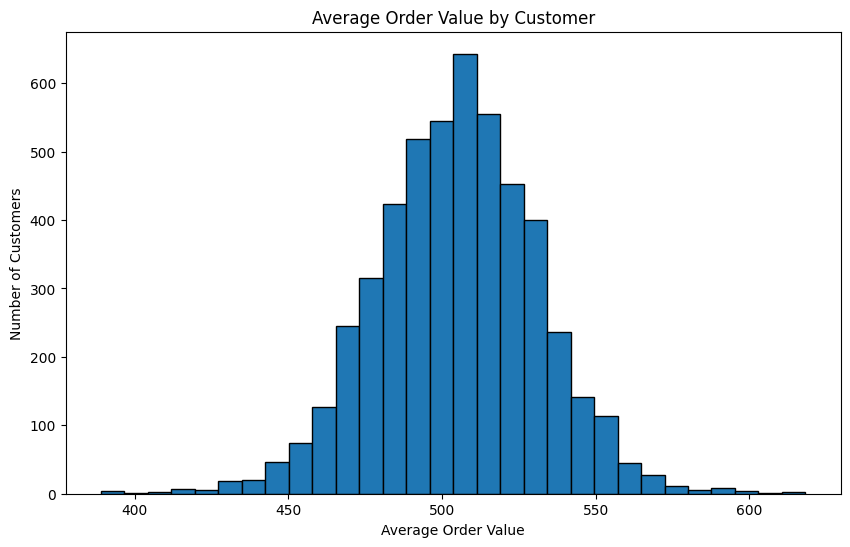

In [40]:
# Group by Customer-ID and calculate average order value
average_order_value = order.groupby('Customer-ID')['Invoice-Value'].mean().reset_index()
average_order_value.columns = ['Customer-ID', 'Average Order Value']

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(average_order_value['Average Order Value'], bins=30, edgecolor='k')
plt.xlabel('Average Order Value')
plt.ylabel('Number of Customers')
plt.title('Average Order Value by Customer')
plt.show()


Evaluate the performance of store managers based on sales metrics, customers satisfaction and store operation?

Store Manager Performance:
       Store-ID  Store-ZIP        Address     Store-Manager Store-Opening  \
21  99601110012     110012  Sarai Rohilla       Naina Joshi    2005-04-21   
40  84307110020     110020    Vasant Kunj  Aanya Srinivasan    2006-04-09   
44  33693110041     110041         Mundka     Advaita Menon    1995-04-06   
29  45818110031     110031    Mayur Vihar    Yuvraj Chauhan    1991-07-22   
49  66510110023     110023     Green Park        Krish Nair    2018-02-16   

    Cluster  Total Sales  Number of Orders  Avg Order Value  
21        4      6743778             13314       506.517801  
40        6      6741750             13303       506.784184  
44        7      6715376             13241       507.165320  
29        5      6699681             13225       506.592136  
49        8      6695841             13242       505.651790  


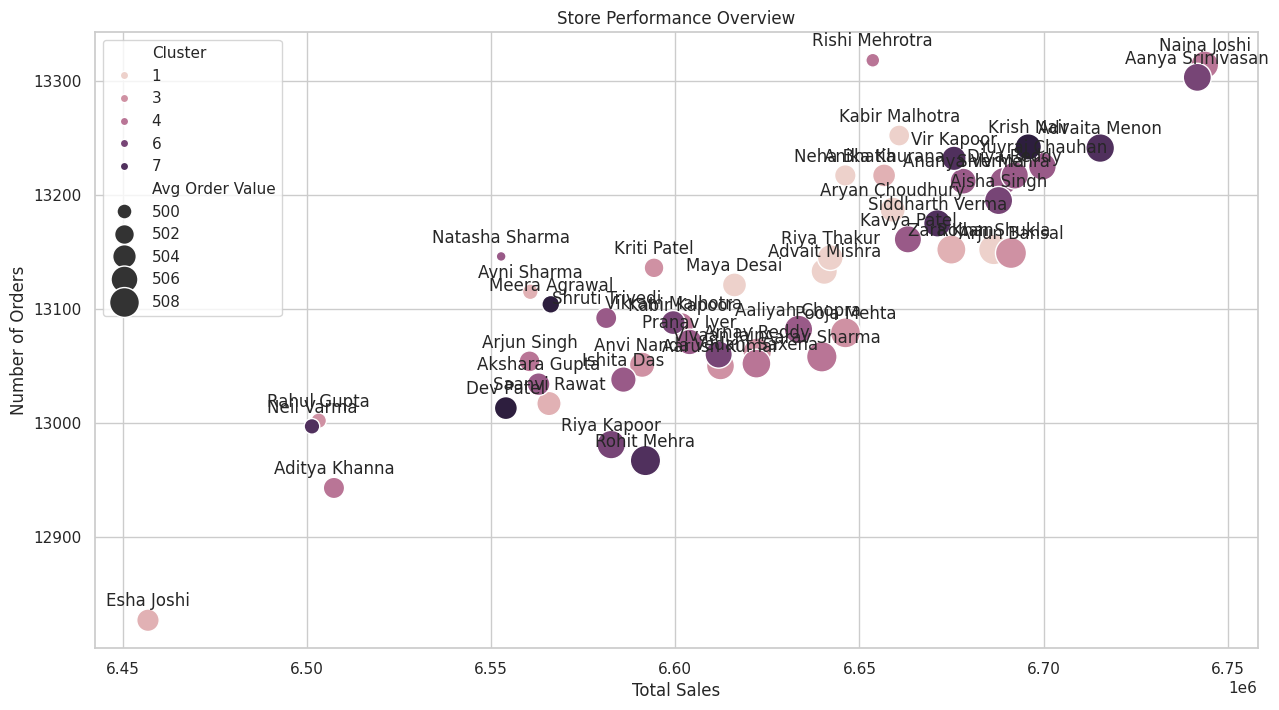

In [47]:
store_performance = store.merge(order.groupby('Store-ID').agg({
    'Invoice-Value': 'sum',
    'Order-ID': 'count'
}), on='Store-ID')
store_performance.columns = ['Store-ID', 'Store-ZIP', 'Address', 'Store-Manager', 'Store-Opening', 'Cluster', 'Total Sales', 'Number of Orders']
store_performance['Avg Order Value'] = store_performance['Total Sales'] / store_performance['Number of Orders']

print("Store Manager Performance:")
store_performance_sorted = store_performance.sort_values('Total Sales', ascending=False)
print(store_performance_sorted.head())

# Visualization
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
sns.scatterplot(data=store_performance, x='Total Sales', y='Number of Orders',
                size='Avg Order Value', hue='Cluster', sizes=(50, 500))
plt.title('Store Performance Overview')
plt.xlabel('Total Sales')
plt.ylabel('Number of Orders')

# Annotate with store manager names
for i, row in store_performance.iterrows():
    plt.annotate(row['Store-Manager'], (row['Total Sales'], row['Number of Orders']),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

Is there a correlation between the location and total sales?

Total sales by location:
Address
Rajouri Garden    12617317
Civil Lines        8805895
Karol Bagh         8714084
Nangloi            8357374
Naraina            8219007
Name: Invoice-Value, dtype: int64


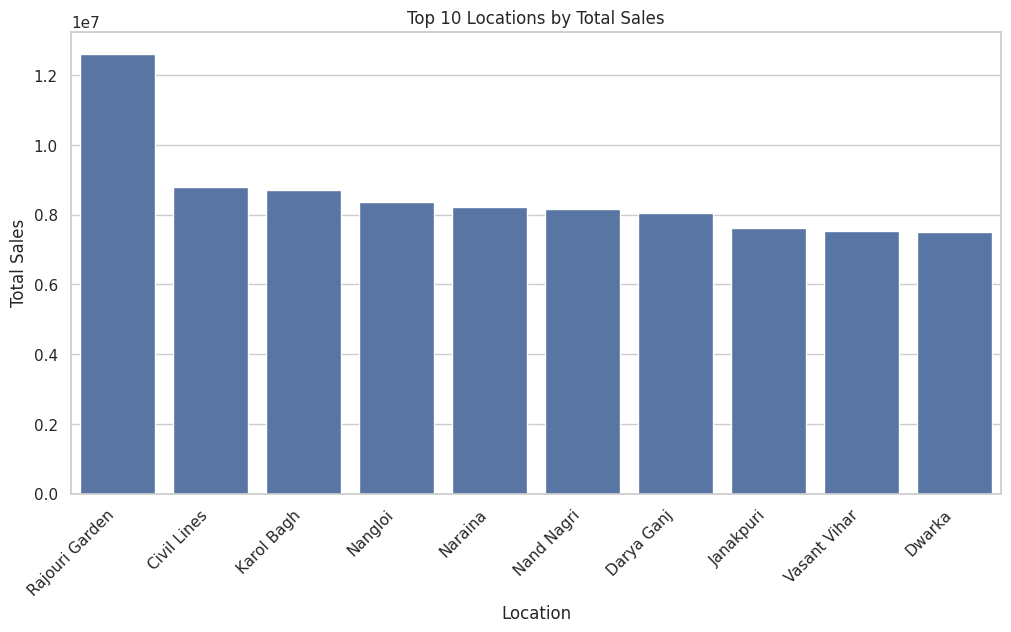

In [49]:
location_sales = customer_orders.groupby('Address')['Invoice-Value'].sum().sort_values(ascending=False)
print("Total sales by location:")
print(location_sales.head())

# Top 10 locations by sales
top_10_locations = location_sales.nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_locations.index, y=top_10_locations.values)
plt.title('Top 10 Locations by Total Sales')
plt.xlabel('Location')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

What is the contribution of sales by the year customer became members?

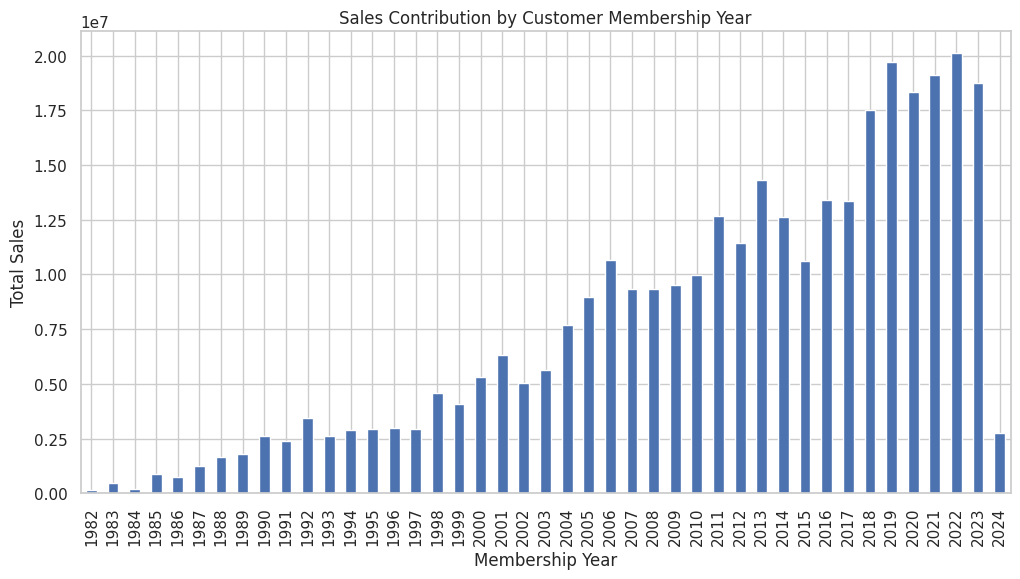

In [54]:
customer_orders['Membership Year'] = customer_orders['Membership-Date'].dt.year
membership_year_sales = customer_orders.groupby('Membership Year')['Invoice-Value'].sum()

plt.figure(figsize=(12, 6))
membership_year_sales.plot(kind='bar')
plt.title('Sales Contribution by Customer Membership Year')
plt.xlabel('Membership Year')
plt.ylabel('Total Sales')
plt.show()


How do the sales differ between weekdays and weekends?

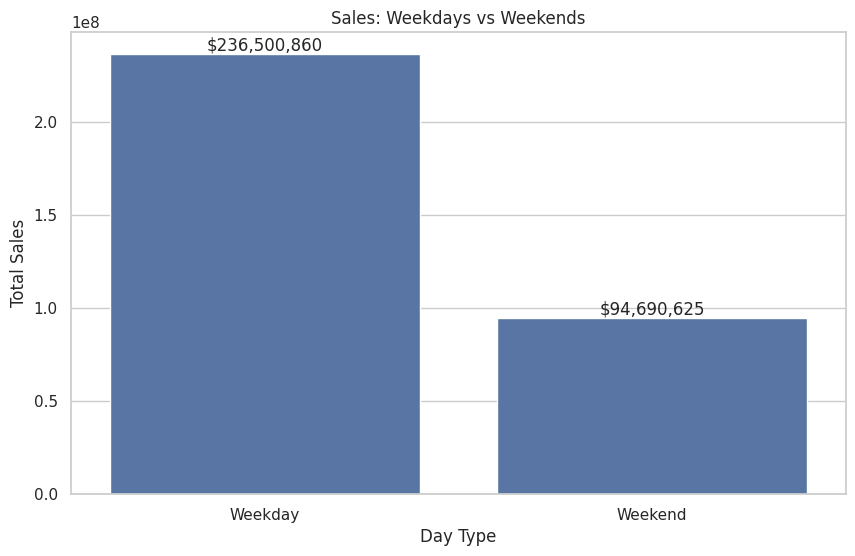

In [57]:
customer_orders['Is Weekend'] = customer_orders['Order-Date'].dt.dayofweek.isin([5, 6])
weekday_weekend_sales = customer_orders.groupby('Is Weekend')['Invoice-Value'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=['Weekday', 'Weekend'], y=weekday_weekend_sales.values)
plt.title('Sales: Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Total Sales')
for i, v in enumerate(weekday_weekend_sales.values):
    plt.text(i, v, f'${v:,.0f}', ha='center', va='bottom')
plt.show()

Identify different customers segments based on their purchasing power (highest, moderate lowest)? Kmeans clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


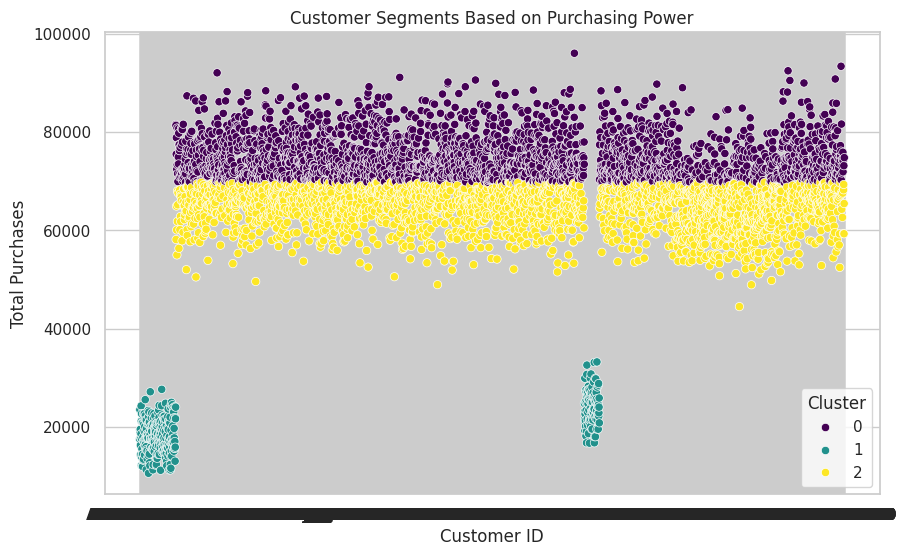

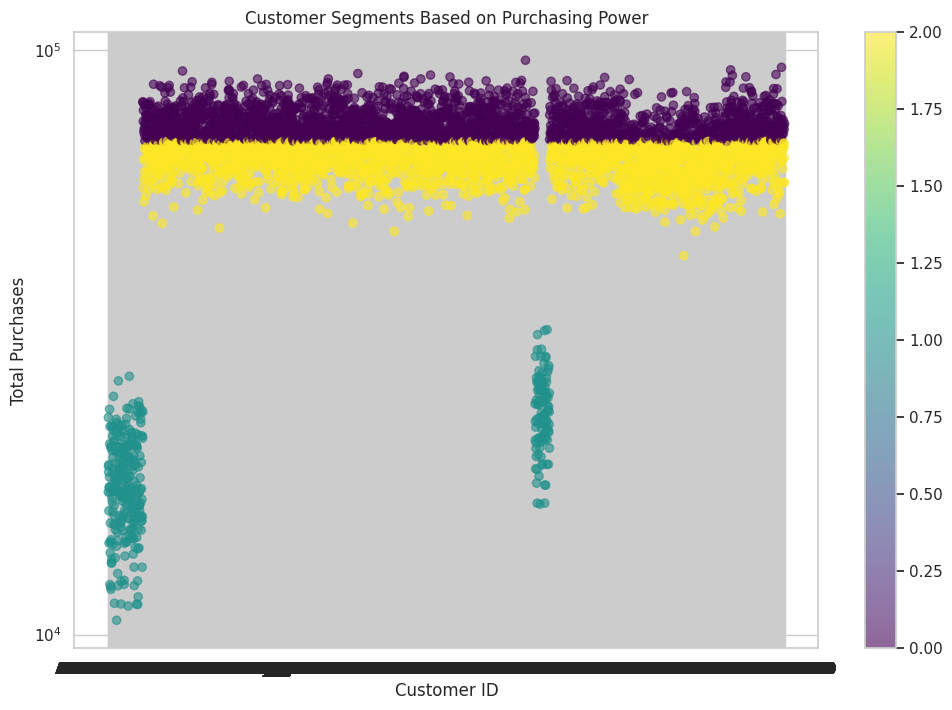

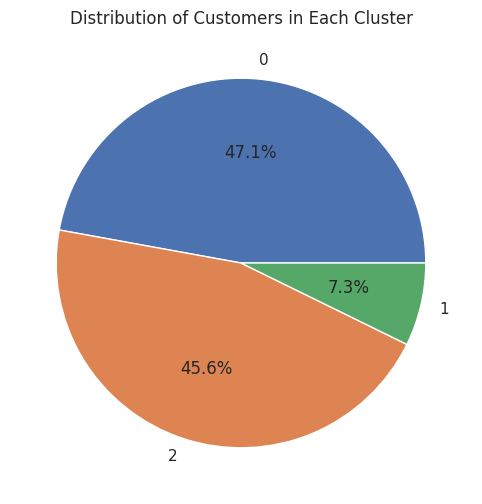

In [61]:
customer_purchases = order.groupby('Customer-ID')['Invoice-Value'].sum().reset_index()
scaler = StandardScaler()
X = scaler.fit_transform(customer_purchases[['Invoice-Value']])

kmeans = KMeans(n_clusters=3, random_state=42)
customer_purchases['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_purchases, x='Customer-ID', y='Invoice-Value', hue='Cluster', palette='viridis')
plt.title('Customer Segments Based on Purchasing Power')
plt.xlabel('Customer ID')
plt.ylabel('Total Purchases')
plt.show()



# Identify different customers segments based on their purchasing power (highest, moderate lowest)? Kmeans clustering
plt.figure(figsize=(12, 8))
scatter = plt.scatter(customer_purchases['Customer-ID'], customer_purchases['Invoice-Value'],
                      c=customer_purchases['Cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.title('Customer Segments Based on Purchasing Power')
plt.xlabel('Customer ID')
plt.ylabel('Total Purchases')
plt.yscale('log')  # Using log scale for better visualization
plt.show()

# Distribution of customers in each cluster
plt.figure(figsize=(10, 6))
customer_purchases['Cluster'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Customers in Each Cluster')
plt.ylabel('')
plt.show()

Assess the impact of membership program on customers loyalty and sales?

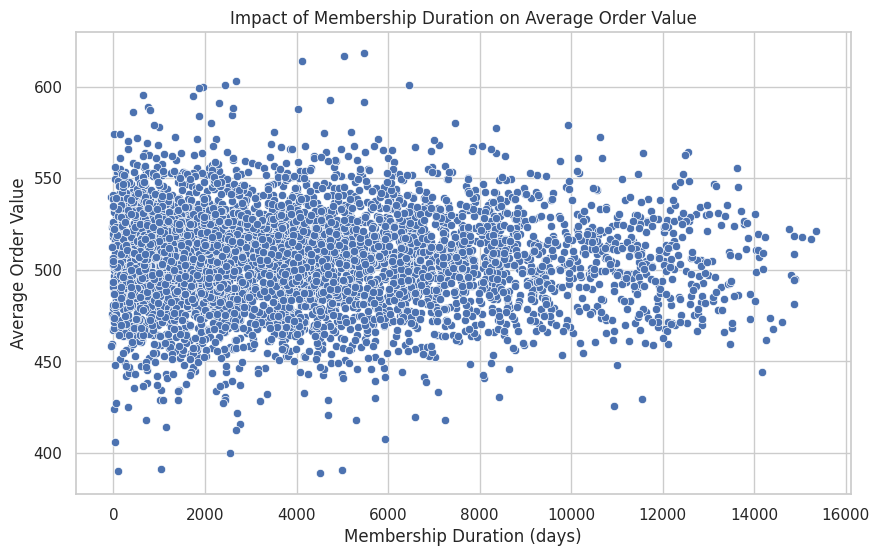

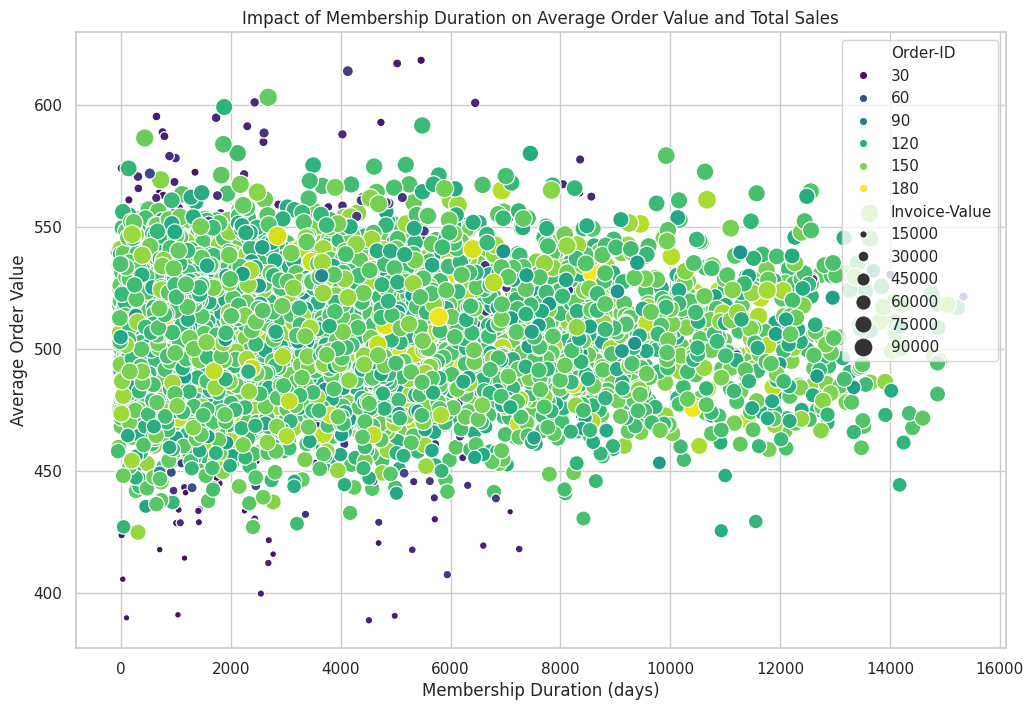

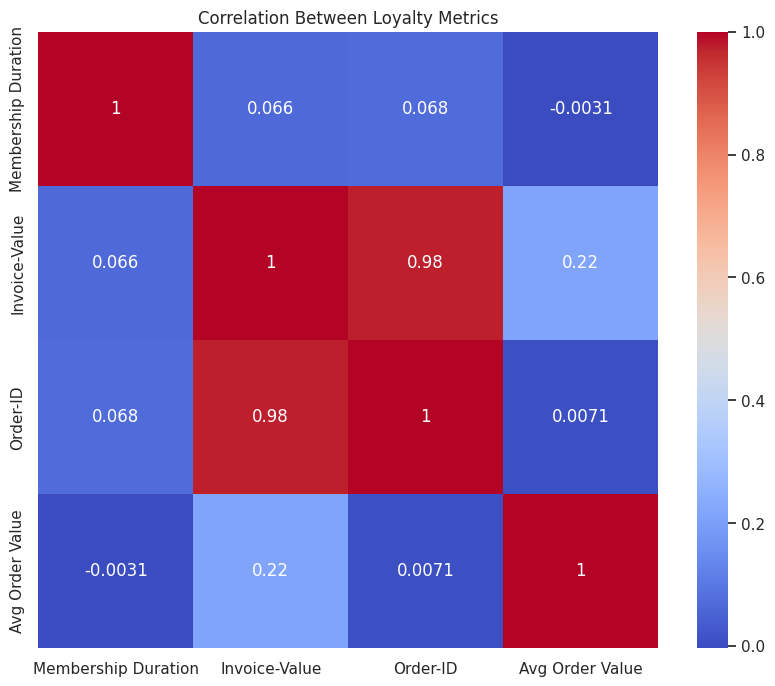

In [62]:
customer_orders['Membership Duration'] = (customer_orders['Order-Date'] - customer_orders['Membership-Date']).dt.days
loyalty_impact = customer_orders.groupby('Customer-ID').agg({
    'Membership Duration': 'max',
    'Invoice-Value': 'sum',
    'Order-ID': 'count'
})
loyalty_impact['Avg Order Value'] = loyalty_impact['Invoice-Value'] / loyalty_impact['Order-ID']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=loyalty_impact, x='Membership Duration', y='Avg Order Value')
plt.title('Impact of Membership Duration on Average Order Value')
plt.xlabel('Membership Duration (days)')
plt.ylabel('Average Order Value')
plt.show()
plt.figure(figsize=(12, 8))
sns.scatterplot(data=loyalty_impact, x='Membership Duration', y='Avg Order Value',
                size='Invoice-Value', hue='Order-ID', palette='viridis', sizes=(20, 200))
plt.title('Impact of Membership Duration on Average Order Value and Total Sales')
plt.xlabel('Membership Duration (days)')
plt.ylabel('Average Order Value')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(loyalty_impact.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Loyalty Metrics')
plt.show()

Which year/month records the highest store openings?

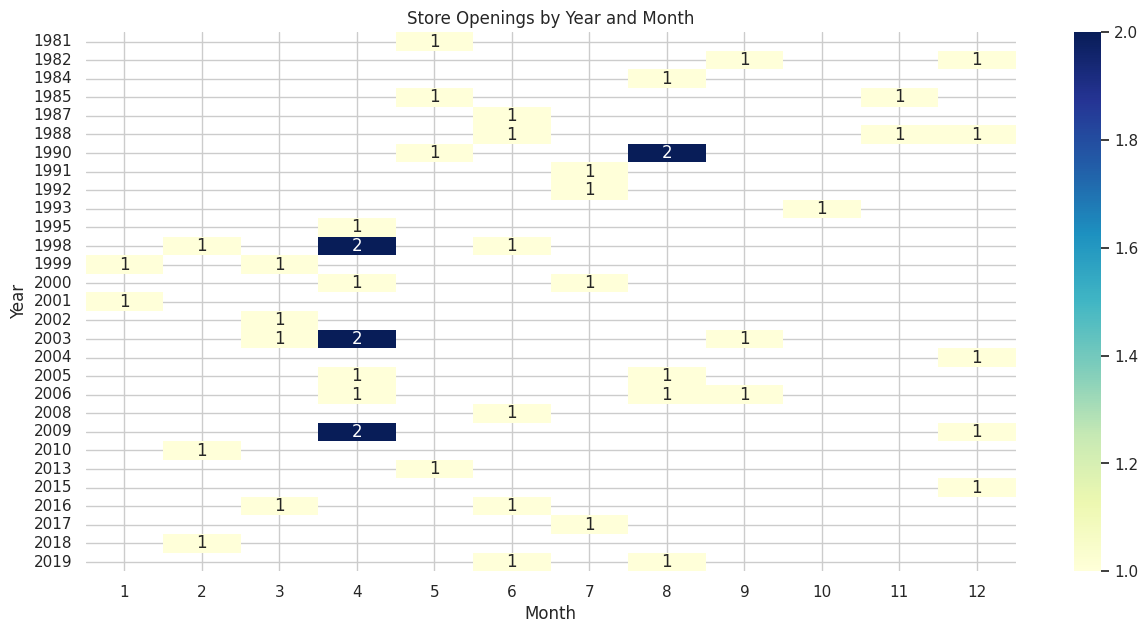

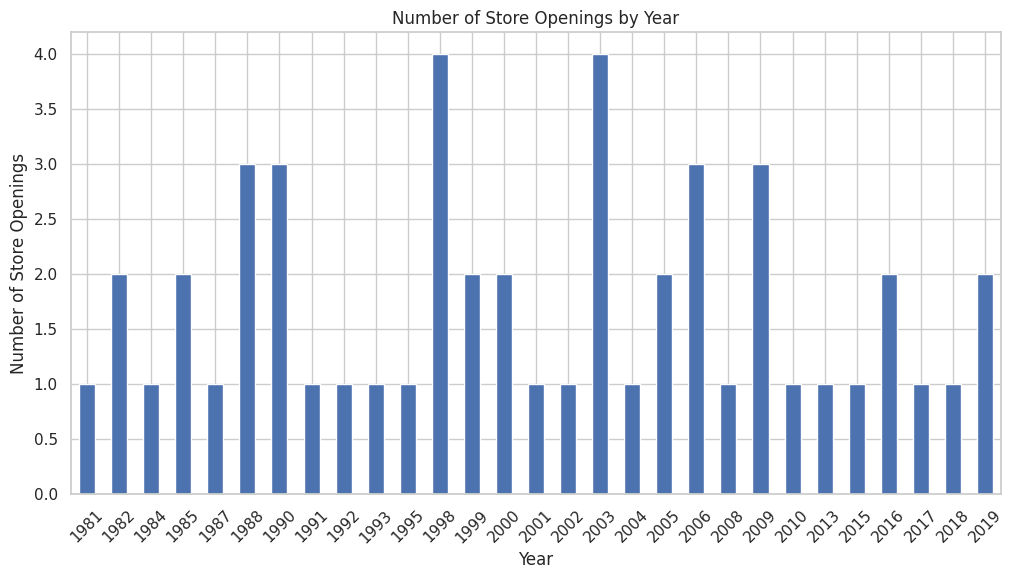

In [64]:
store['Opening Year'] = store['Store-Opening'].dt.year
store['Opening Month'] = store['Store-Opening'].dt.month

store_openings = store.groupby(['Opening Year', 'Opening Month']).size().unstack()

plt.figure(figsize=(15, 7))
sns.heatmap(store_openings, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Store Openings by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


# Yearly trend of store openings
yearly_openings = store['Opening Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
yearly_openings.plot(kind='bar')
plt.title('Number of Store Openings by Year')
plt.xlabel('Year')
plt.ylabel('Number of Store Openings')
plt.xticks(rotation=45)
plt.show()